# Task 4.9 (Part 2)

## Import libraries and import the data set from part 1 in this task

In [60]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [61]:
path = r'/Users/rusamijan/03-2023 Instacart Basket Analysis'

In [62]:
df_ords_prods_custs_all = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_all.pkl'))

In [50]:
df_ords_prods_custs_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_of_registration,number_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [51]:
df_ords_prods_custs_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              float64 
 7   add_to_cart_order       float64 
 8   reordered               float64 
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [52]:
df_ords_prods_custs_all.shape

(32404859, 31)

## Create Bar Chart

<AxesSubplot:>

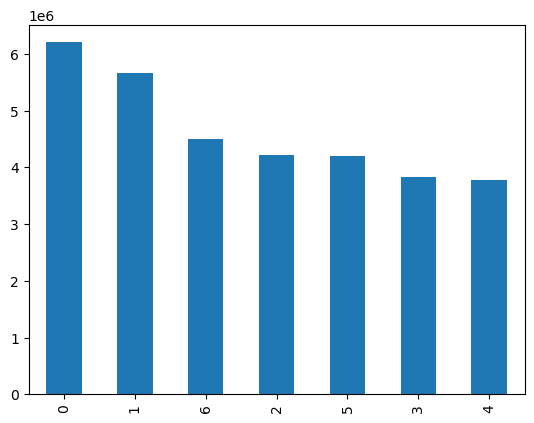

In [53]:
df_ords_prods_custs_all['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

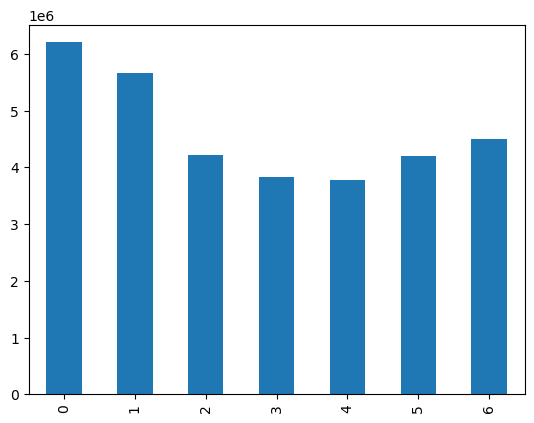

In [54]:
#sorting
df_ords_prods_custs_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

TypeError: 'str' object is not callable

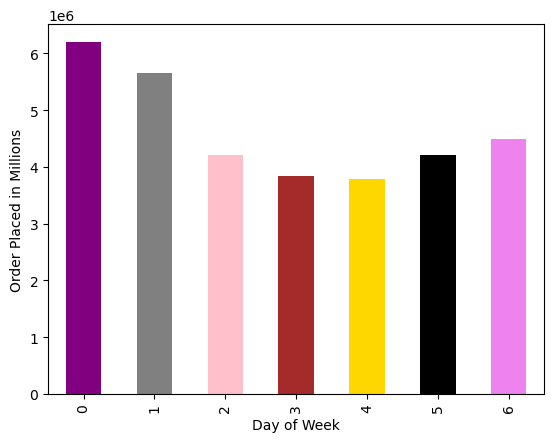

In [59]:
#change colors
bar_ords_week=df_ords_prods_custs_all['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'gray', 'pink', 'brown', 'gold', 'black', 'violet'])
plt.xlabel('Day of Week')
plt.ylabel('Order Placed in Millions')
plt.title ('')

In [ ]:
bar_ords_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ords_week_03.15.png'))

In [ ]:
#creating a barchart with the price range of the products
bar_price_range =df_price_rag['price_range_loc'].value_counts().plot.bar(rot = 45, color = 'blue')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.title ('Instacart Products Price Range')

## Create Histogram

In [ ]:
# Creating a histogram for prices
plt.title('Frequency of Instacart Product Price', fontsize = 18, pad=20)
hist_prices = df_ords_prods_custs_all['prices'].plot.hist(bins = 100)

### Investigate why histogram shows just 1 column

In [ ]:
df_ords_prods_custs_all['prices'].max()

Extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart.

## Create scatterplot for checking the outliner

In [ ]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_custs_all)

In [ ]:
# Check for there are any values above a certain threshold in your data
df_ords_prods_custs_all.loc[df_ords_prods_custs_all['prices'] > 100]

### Manage outlier--treat them as missing value. Price > 1000 = NaNs

In [ ]:
df_ords_prods_custs_all.loc[df_ords_prods_custs_all['prices'] >100, 'prices'] = np.nan

In [ ]:
df_ords_prods_custs_all['prices'].max()

Succesfully! we replaced all the outliers with missing values, The max value is a much more realistic price point of 25.

In [ ]:
#export the update data 
df_ords_prods_custs_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_all.pkl'))

## Retry histogram

In [ ]:
hist_prices=df_ords_prods_custs_all['prices'].plot.hist(bins=100)

## Retry scatter plot

In [ ]:
scatterplot_prices=sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_custs_all, color='gray')

## Prepare Sampling Data

In [ ]:
# Create a list holding true/false values to test np.random.rand()<= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_custs_all)) <= 0.7
dev

In [ ]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_custs_all[dev]

In [ ]:
#Store 30% of the sample in the dataframe small
small = df_ords_prods_custs_all[~dev]

### check that you’ve achieved the results you expected

In [ ]:
len(df_ords_prods_custs_all)

In [ ]:
len(big)+len(small)

In [ ]:
# Creating a subset data frame for our line chart
df_small = small[['orders_day_of_week','prices']]

## Create Line Chart

In [ ]:
line_chart_week_prices = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices',color='black')
plt.xlabel('Orders Day of Week')
plt.ylabel('Prices')
plt.title ('Spending Habits by Day of Week')

This line chart took 2 mins and 16 seconds to create for my macbook pro

## Q3. you need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.¶
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

In [ ]:
hist_order_hour_of_day=df_ords_prods_custs_all['order_hour_of_day'].plot.hist(bins=70)
plt.xlabel('24 Hours')
plt.ylabel('Orders Placed In Millions')
plt.title ('Time of Order')

#### The histogram is showing the frequency values of orders per hour in the whole dataset

## Q4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

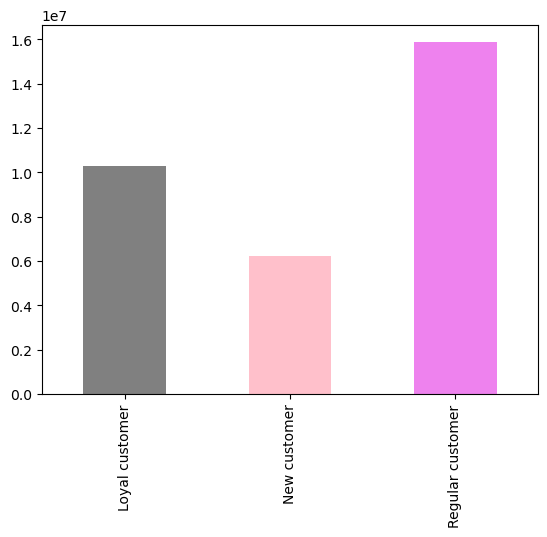

In [71]:
#change colors
barchart_loyalty_customers = df_ords_prods_custs_all['loyalty_flag'].value_counts().sort_index().plot.bar(color =['gray','pink', 'violet'])


## Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [ ]:
# Creating a subset data frame for our line chart
df_order_hour_of_day_prices = small[['order_hour_of_day','prices']]

In [ ]:
df_order_hour_of_day_prices.head()

In [ ]:
df_order_hour_of_day_prices.shape

In [ ]:
# creating a line chart of hour and prices
line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, color='brown', x = 'order_hour_of_day',y = 'prices')

### Q6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows

In [ ]:
# Creating a subset data frame for our line chart
df_age_dependants = small[['age','number_dependants']] 

In [ ]:
df_age_dependants.head()

In [ ]:
#creating line chart 
line_chart_age_dependants = sns.lineplot(data = df_age_dependants, color='violet', linewidth=2.5, x = 'age',y = 'number_dependants')

#### The line chart shows age vs number of dependants. There is a lot going on in the chart. It is difficult to find the conclusion from this chart. 

## Q7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [ ]:
scatterplot_age_income=sns.scatterplot(x = 'age', y = 'income',data = df_ords_prods_custs_all, color='purple')

#### This chart is showing between age vs income. We can see that as higher the age is as higher the income is. Lower income values are seen from people below 40 years old. On the other side, above 40, income increases considerably.

##  Export your visualizations as “.png” files in your relevant project folder.

In [ ]:
bar_ords_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ords_week_03.15.png'))

In [ ]:
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_03.15.png'))

In [ ]:
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices_03.15.png'))

In [ ]:
line_chart_week_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_week_prices_03.15.png'))

In [ ]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_03.15.png'))

In [ ]:
barchart_loyalty_customers.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_loyalty_customers_03.15.png'))

In [ ]:
line_chart_order_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_order_hour_of_day_prices_03.15.png'))

In [ ]:
line_chart_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age_dependants_03.15.png'))

In [ ]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income_03.15.png'))